<a href="https://colab.research.google.com/github/rdturbo/pracml/blob/master/regression01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!pip install quandl

  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [0]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [0]:
style.use('ggplot')

In [61]:
quandl.ApiConfig.api_key = 'QWSxxn-kEivbazzF-24B'
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [0]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_CHANGE'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [0]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_CHANGE', 'Adj. Volume']]

forecast_col = 'Adj. Close'

#for missing values put outliers
df.fillna(-99999, inplace = True)

forecast_out = int(math.ceil(0.01*len(df)))

In [0]:
df['label'] = df[forecast_col].shift(forecast_out)



In [0]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])


In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [0]:
##clf = LinearRegression(n_jobs=-1)
##clf.fit(X_train, y_train)

##with open('linearregression.pickle','wb') as f:
##  pickle.dump(clf,f)
  


In [0]:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

In [68]:
accuracy = clf.score(X_test,y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1057.47 1072.   1085.09 1079.78 1073.56 1070.85 1068.86 1065.85 1060.2
 1055.95 1053.4  1073.21 1091.52 1095.76 1110.29 1114.21 1112.79 1110.14
 1111.88 1130.65 1130.7  1139.1  1135.97 1143.5  1164.16 1176.17 1171.29
 1182.14 1187.56 1186.48 1177.37 1182.22 1181.59 1119.2  1068.76] 1.0 35


In [0]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [70]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] +[i]
  
print(df.tail())

            Adj. Close  HL_PCT  PCT_CHANGE  Adj. Volume  label  Forecast
Date                                                                    
2018-04-27         NaN     NaN         NaN          NaN    NaN   1177.37
2018-04-28         NaN     NaN         NaN          NaN    NaN   1182.22
2018-04-29         NaN     NaN         NaN          NaN    NaN   1181.59
2018-04-30         NaN     NaN         NaN          NaN    NaN   1119.20
2018-05-01         NaN     NaN         NaN          NaN    NaN   1068.76


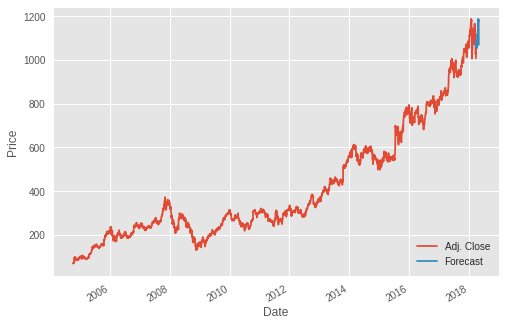

In [71]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()